In [666]:
import pandas as pd
import os

# Define the OS types and base path for your data
os_types = ["Aws", "Linux", "macOS", "Windows"]
base_path = "text-input/results"

# Initialize empty lists to collect data frames
multi_thread_list = []
single_thread_list = []
resource_list = []

# Loop through each OS type and read the corresponding files
for os_type in os_types:
    multi_thread_path = os.path.join(base_path, os_type, "hashing", "hashing_speed_multi_threads_timing.csv")
    single_thread_path = os.path.join(base_path, os_type, "hashing", "hashing_speed_single_thread_timing.csv")
    resource_path = os.path.join(base_path, os_type, "resource_usage", "hashing_resource_results.csv")
    
    # Read the CSV files into data frames and add the OS column
    multi_thread_df = pd.read_csv(multi_thread_path)
    single_thread_df = pd.read_csv(single_thread_path)
    resource_df = pd.read_csv(resource_path)
    
    multi_thread_df['OS'] = os_type
    single_thread_df['OS'] = os_type
    resource_df['OS'] = os_type
    
    # Append the data frames to the respective lists
    multi_thread_list.append(multi_thread_df)
    single_thread_list.append(single_thread_df)
    resource_list.append(resource_df)

# Concatenate the data frames for each type
multi_thread_df = pd.concat(multi_thread_list, ignore_index=True)
single_thread_df = pd.concat(single_thread_list, ignore_index=True)
resource_df = pd.concat(resource_list, ignore_index=True)


In [667]:
# Map for OS and Algorithm labels
os_labels = {
    'Aws': 'AWS EC2 t2.medium',
    'Windows': 'Windows Laptop',
    'Linux': 'Linux Laptop',
    'macOS': 'MacBook Pro'
}

algorithm_labels = {
    'blake2b': 'BLAKE2b',
    'blake2s': 'BLAKE2s',
    'blake3': 'BLAKE3',
    'md5': 'MD5',
    'sha1': 'SHA1',
    'sha256': 'SHA-256',
    'sha512': 'SHA-512',
    'sha3_256': 'SHA3-256'
}

In [668]:
multi_thread_df.head()

,Algorithm,Data Size (MB),Timing (ms),OS
0,blake3,1,0.379801,Aws
1,blake3,1,0.413179,Aws
2,blake3,1,0.365019,Aws
3,blake3,1,0.355482,Aws
4,blake3,1,0.354528,Aws


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


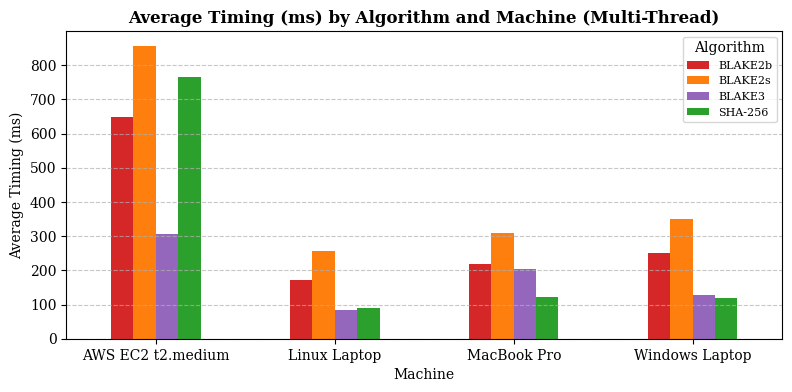

In [669]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
multi_thread_df['OS'] = multi_thread_df['OS'].replace(os_labels)
multi_thread_df['Algorithm'] = multi_thread_df['Algorithm'].replace(algorithm_labels)

# Group by OS and Algorithm, calculate the average Timing
average_timing_multi_thread = multi_thread_df.groupby(['OS', 'Algorithm'])['Timing (ms)'].mean().unstack()

# Configure font to serif
plt.rcParams['font.family'] = 'serif'

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue'
}

# Apply custom colors to the bar plot
color_list = [colors[col] for col in average_timing_multi_thread.columns]
ax = average_timing_multi_thread.plot(
    kind='bar',
    figsize=(8, 4),  # Adjusted figure size for compactness
    color=color_list
)

# Customize the plot
plt.title('Average Timing (ms) by Algorithm and Machine (Multi-Thread)', fontsize=12, fontweight='bold')
plt.xlabel('Machine', fontsize=10)
plt.ylabel('Average Timing (ms)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the left of the plot
plt.legend(
    title='Algorithm',
    fontsize=8,
    loc='upper right'
)

# Make layout compact for LNCS
plt.tight_layout(pad=1.0)

# Save the plot as EPS
output_path = "multi_thread_plots/average_timing_multi_thread_bar_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


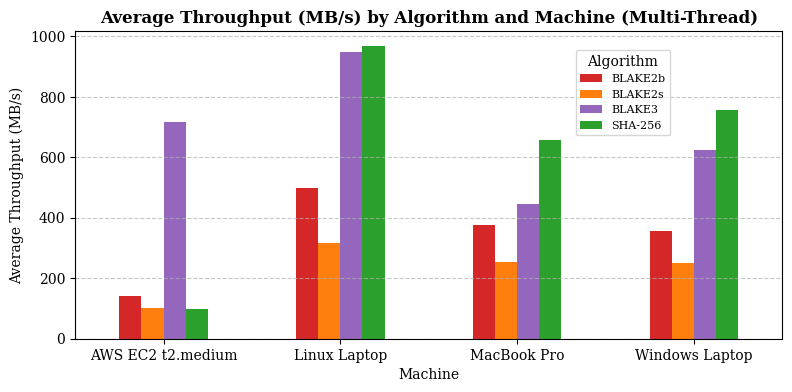

In [670]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
multi_thread_df['OS'] = multi_thread_df['OS'].replace(os_labels)
multi_thread_df['Algorithm'] = multi_thread_df['Algorithm'].replace(algorithm_labels)

# Calculate Throughput (MB/s) for multi_thread_df
multi_thread_df['Throughput (MB/s)'] = (multi_thread_df['Data Size (MB)'] / multi_thread_df['Timing (ms)']) * 1000

# Group by OS and Algorithm to calculate average throughput
average_throughput_multi_thread = multi_thread_df.groupby(['OS', 'Algorithm'])['Throughput (MB/s)'].mean().unstack()

# Configure font to serif
plt.rcParams['font.family'] = 'serif'

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue'
}

# Apply custom colors to the bar plot
color_list = [colors[col] for col in average_throughput_multi_thread.columns]
ax = average_throughput_multi_thread.plot(
    kind='bar',
    figsize=(8, 4),  # Adjusted figure size for compactness
    color=color_list
)

# Customize the plot
plt.title('Average Throughput (MB/s) by Algorithm and Machine (Multi-Thread)', fontsize=12, fontweight='bold')
plt.xlabel('Machine', fontsize=10)
plt.ylabel('Average Throughput (MB/s)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the left of the plot
plt.legend(
    title='Algorithm',
    fontsize=8,
    loc='center left',
    bbox_to_anchor=(0.7, 0.8)
)

# Make layout compact for LNCS
plt.tight_layout(pad=1.0)

# Save the plot as EPS
output_path = "multi_thread_plots/average_throughput_multi_thread_bar_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


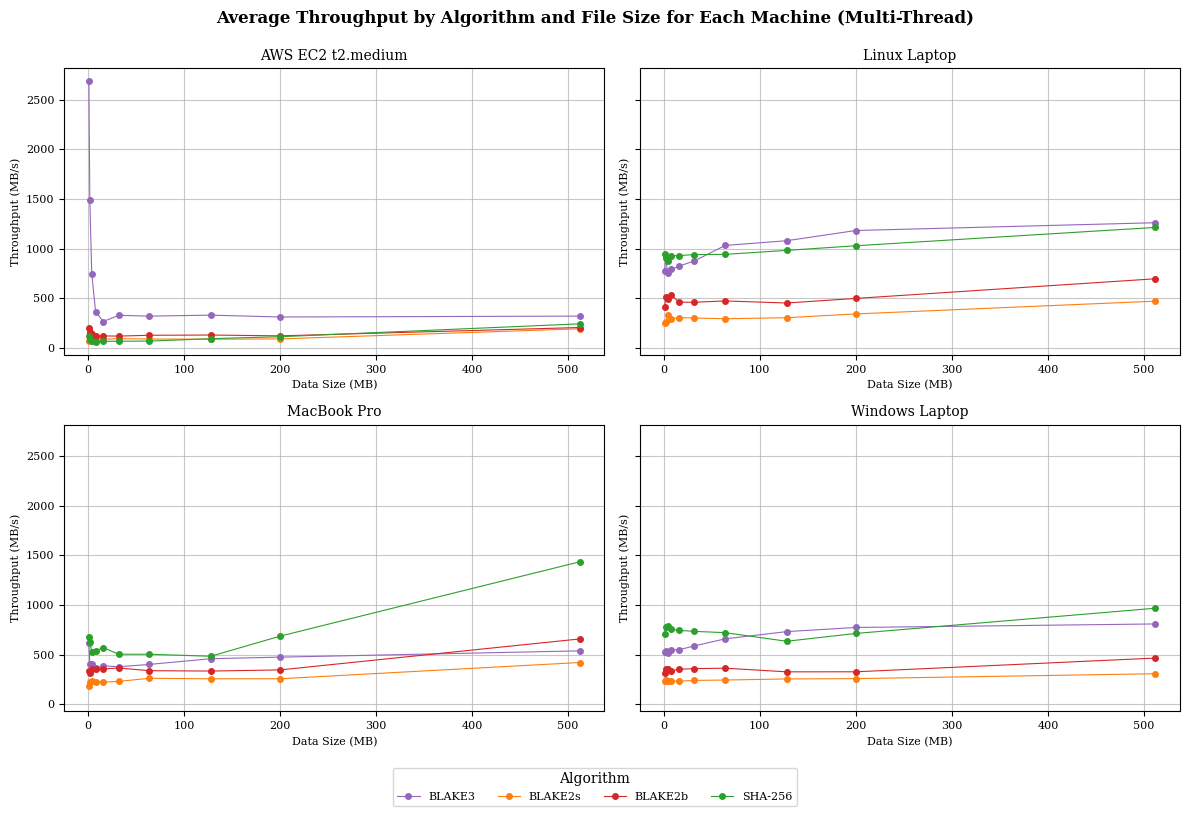

In [671]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
multi_thread_df['OS'] = multi_thread_df['OS'].replace(os_labels)
multi_thread_df['Algorithm'] = multi_thread_df['Algorithm'].replace(algorithm_labels)

# Ensure Throughput (MB/s) is calculated for multi_thread_df
multi_thread_df['Throughput (MB/s)'] = (multi_thread_df['Data Size (MB)'] / multi_thread_df['Timing (ms)']) * 1000

# Get unique operating systems and algorithms
os_list = multi_thread_df['OS'].unique()
algorithm_list = multi_thread_df['Algorithm'].unique()

# Create subplots for each OS
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

# Store line objects for the legend
line_objects = []
line_labels = []

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue'
}

# Plot average throughput for each algorithm and file size for each OS
for i, os_type in enumerate(os_list):
    os_data = multi_thread_df[multi_thread_df['OS'] == os_type]
    for algorithm in algorithm_list:
        algo_data = os_data[os_data['Algorithm'] == algorithm]
        avg_throughput = algo_data.groupby('Data Size (MB)')['Throughput (MB/s)'].mean()
        
        # Plot on the corresponding subplot with thinner lines and markers
        line, = axes[i].plot(
            avg_throughput.index,
            avg_throughput.values,
            marker='o',
            linewidth=0.8,  # Thinner line
            markersize=4,   # Smaller marker
            label=algorithm,
            color=colors[algorithm]
        )
        
        # Collect the line object and label only once (to avoid duplicates)
        if algorithm not in line_labels:
            line_objects.append(line)
            line_labels.append(algorithm)
    
    # Customize the subplot
    axes[i].set_title(f"{os_type}", fontsize=10)
    axes[i].set_xlabel('Data Size (MB)', fontsize=8)
    axes[i].set_ylabel('Throughput (MB/s)', fontsize=8)
    axes[i].grid(alpha=0.7)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Add a single shared legend
fig.legend(
    line_objects,
    line_labels,
    title="Algorithm",
    loc="upper center",
    bbox_to_anchor=(0.5, 0),
    fontsize=8,
    ncol=len(line_labels)  # Single row
)

# Adjust layout
plt.suptitle(
    'Average Throughput by Algorithm and File Size for Each Machine (Multi-Thread)', 
    fontsize=12,
    fontweight='bold',  # Bold suptitle
    y=0.94  # Move closer to subplots
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as EPS
output_path = "multi_thread_plots/average_throughput_multi_thread_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


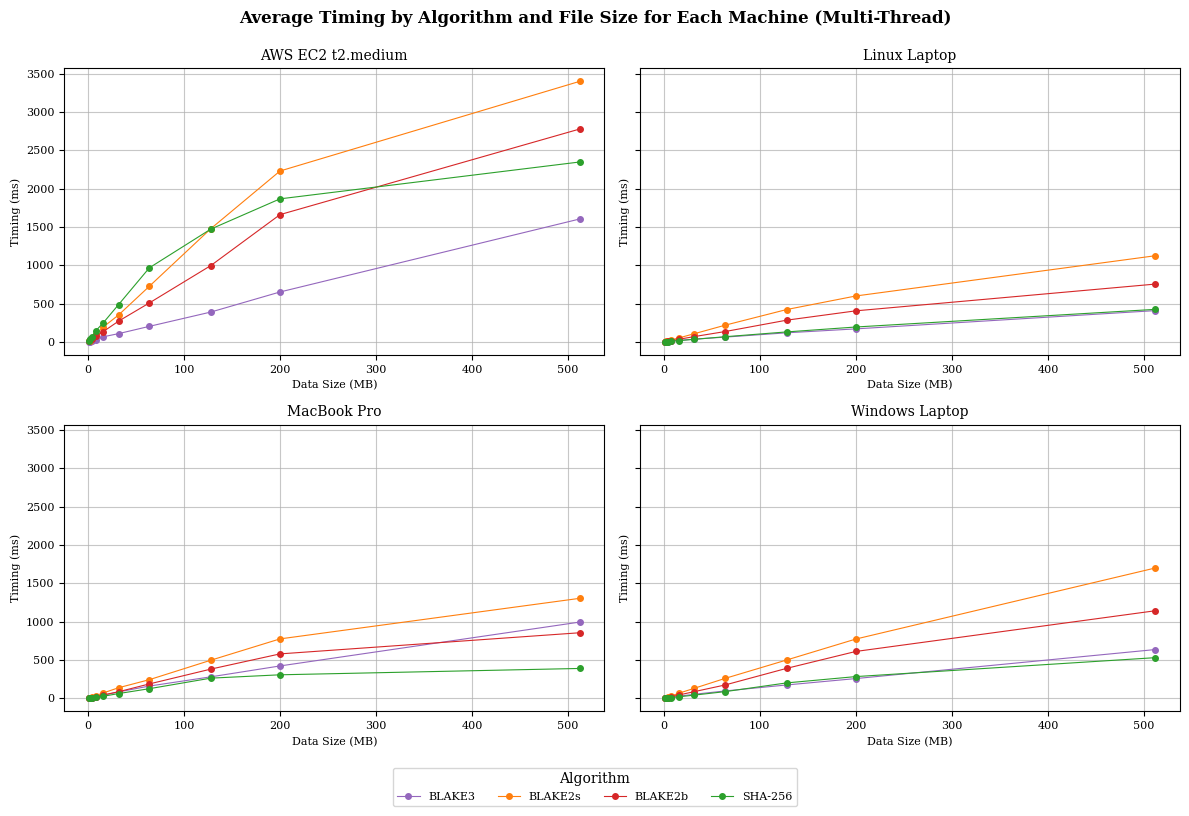

In [672]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
multi_thread_df['OS'] = multi_thread_df['OS'].replace(os_labels)
multi_thread_df['Algorithm'] = multi_thread_df['Algorithm'].replace(algorithm_labels)

# Get unique operating systems and algorithms
os_list = multi_thread_df['OS'].unique()
algorithm_list = multi_thread_df['Algorithm'].unique()

# Create subplots for each OS
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

# Store line objects for the legend
line_objects = []
line_labels = []

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
}

# Plot average timing for each algorithm and file size for each OS
for i, os_type in enumerate(os_list):
    os_data = multi_thread_df[multi_thread_df['OS'] == os_type]
    for algorithm in algorithm_list:
        algo_data = os_data[os_data['Algorithm'] == algorithm]
        avg_timing = algo_data.groupby('Data Size (MB)')['Timing (ms)'].mean()
        
        # Plot on the corresponding subplot with thinner lines and smaller markers
        line, = axes[i].plot(
            avg_timing.index,
            avg_timing.values,
            marker='o',
            linewidth=0.8,  # Thinner line
            markersize=4,   # Smaller marker
            label=algorithm,
            color=colors[algorithm]
        )
        
        # Collect the line object and label only once (to avoid duplicates)
        if algorithm not in line_labels:
            line_objects.append(line)
            line_labels.append(algorithm)
    
    # Customize the subplot
    axes[i].set_title(f"{os_type}", fontsize=10)
    axes[i].set_xlabel('Data Size (MB)', fontsize=8)
    axes[i].set_ylabel('Timing (ms)', fontsize=8)
    axes[i].grid(alpha=0.7)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Add a single shared legend
fig.legend(
    line_objects,
    line_labels,
    title="Algorithm",
    loc="upper center",
    bbox_to_anchor=(0.5, 0),
    fontsize=8,
    ncol=len(line_labels)  # Single row
)

# Adjust layout
plt.suptitle(
    'Average Timing by Algorithm and File Size for Each Machine (Multi-Thread)', 
    fontsize=12,
    fontweight='bold',
    y=0.94
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as EPS
output_path = "multi_thread_plots/average_timing_multi_thread_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

In [673]:
single_thread_df.head()

,Algorithm,Data Size (MB),Timing (ms),OS
0,md5,1,1.775503,Aws
1,md5,1,1.891851,Aws
2,md5,1,1.632452,Aws
3,md5,1,1.575470,Aws
4,md5,1,1.573563,Aws


In [674]:
single_thread_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Algorithm       1600 non-null   object 
 1   Data Size (MB)  1600 non-null   int64  
 2   Timing (ms)     1600 non-null   float64
 3   OS              1600 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 50.1+ KB


In [675]:
# Count the number of 0 values in each column of the single_thread_df
zero_counts_st = (single_thread_df == 0).sum()

# Display the total number of 0 values in the entire DataFrame
total_zeros_st = (single_thread_df == 0).sum().sum()

print("Number of 0 values in each column:")
print(zero_counts_st)

print(f"\nTotal number of 0 values in single_thread_df: {total_zeros_st}")

Number of 0 values in each column:
Algorithm         0
Data Size (MB)    0
Timing (ms)       4
OS                0
dtype: int64

Total number of 0 values in single_thread_df: 4


In [676]:
import numpy as np

# Replace 0 values with NaN
single_thread_df = single_thread_df.replace(0, np.nan)

# Drop rows where any value is NaN (previously 0)
single_thread_df = single_thread_df.dropna()

# Reset index for cleanliness (optional)
single_thread_df = single_thread_df.reset_index(drop=True)

# Display the updated DataFrame
print(single_thread_df.head())

  Algorithm  Data Size (MB)  Timing (ms)   OS
0       md5               1     1.775503  Aws
1       md5               1     1.891851  Aws
2       md5               1     1.632452  Aws
3       md5               1     1.575470  Aws
4       md5               1     1.573563  Aws


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


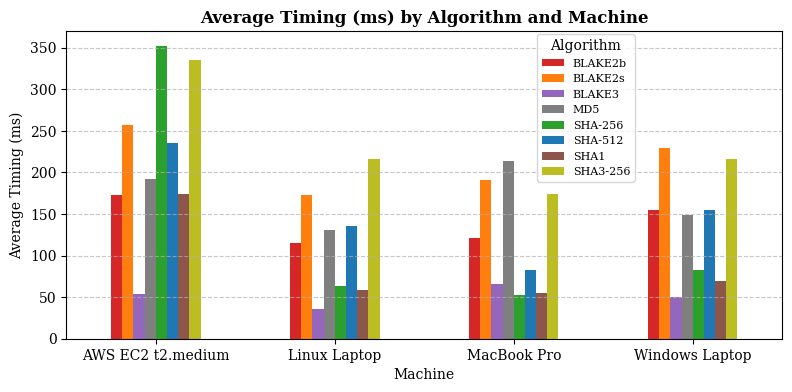

In [677]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
single_thread_df['OS'] = single_thread_df['OS'].replace(os_labels)
single_thread_df['Algorithm'] = single_thread_df['Algorithm'].replace(algorithm_labels)

# Group by OS and Algorithm, calculate the average Timing
average_timing = single_thread_df.groupby(['OS', 'Algorithm'])['Timing (ms)'].mean().unstack()

# Configure font to serif
plt.rcParams['font.family'] = 'serif'

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'MD5': 'tab:gray',
    'SHA1': 'tab:brown',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
    'SHA3-256': 'tab:olive'
}

# Apply custom colors to the bar plot
color_list = [colors[col] for col in average_timing.columns]
ax = average_timing.plot(
    kind='bar',
    figsize=(8, 4),  # Adjusted figure size for compactness
    color=color_list
)

# Customize the plot
plt.title('Average Timing (ms) by Algorithm and Machine', fontsize=12, fontweight='bold')
plt.xlabel('Machine', fontsize=10)
plt.ylabel('Average Timing (ms)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the left of the plot
plt.legend(
    title='Algorithm',
    fontsize=8,
    loc='center left',
    bbox_to_anchor=(0.65, 0.75)
)

# Make layout compact for LNCS
plt.tight_layout(pad=1.0)

# Save the plot as EPS
output_path = "single_thread_plots/average_timing_bar_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


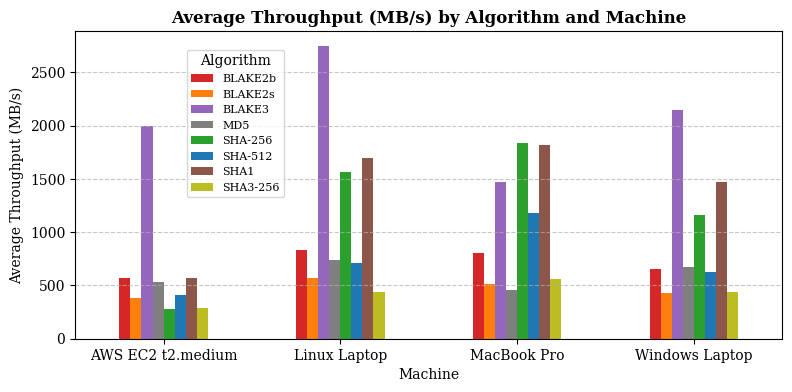

In [678]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
single_thread_df['OS'] = single_thread_df['OS'].replace(os_labels)
single_thread_df['Algorithm'] = single_thread_df['Algorithm'].replace(algorithm_labels)

# Calculate Throughput (MB/s)
single_thread_df['Throughput (MB/s)'] = (single_thread_df['Data Size (MB)'] / single_thread_df['Timing (ms)']) * 1000

# Group by OS and Algorithm to calculate average throughput
average_throughput = single_thread_df.groupby(['OS', 'Algorithm'])['Throughput (MB/s)'].mean().unstack()

# Configure font to serif
plt.rcParams['font.family'] = 'serif'

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'MD5': 'tab:gray',
    'SHA1': 'tab:brown',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
    'SHA3-256': 'tab:olive'
}

# Apply custom colors to the bar plot
color_list = [colors[col] for col in average_throughput.columns]
ax = average_throughput.plot(
    kind='bar',
    figsize=(8, 4),  # Adjusted figure size for compactness
    color=color_list
)

# Customize the plot
plt.title('Average Throughput (MB/s) by Algorithm and Machine', fontsize=12, fontweight='bold')
plt.xlabel('Machine', fontsize=10)
plt.ylabel('Average Throughput (MB/s)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the left of the plot
plt.legend(
    title='Algorithm',
    fontsize=8,
    loc='center left',
    bbox_to_anchor=(0.15, 0.7)
)

# Make layout compact for LNCS
plt.tight_layout(pad=1.0)

# Save the plot as EPS
output_path = "single_thread_plots/average_throughput_bar_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


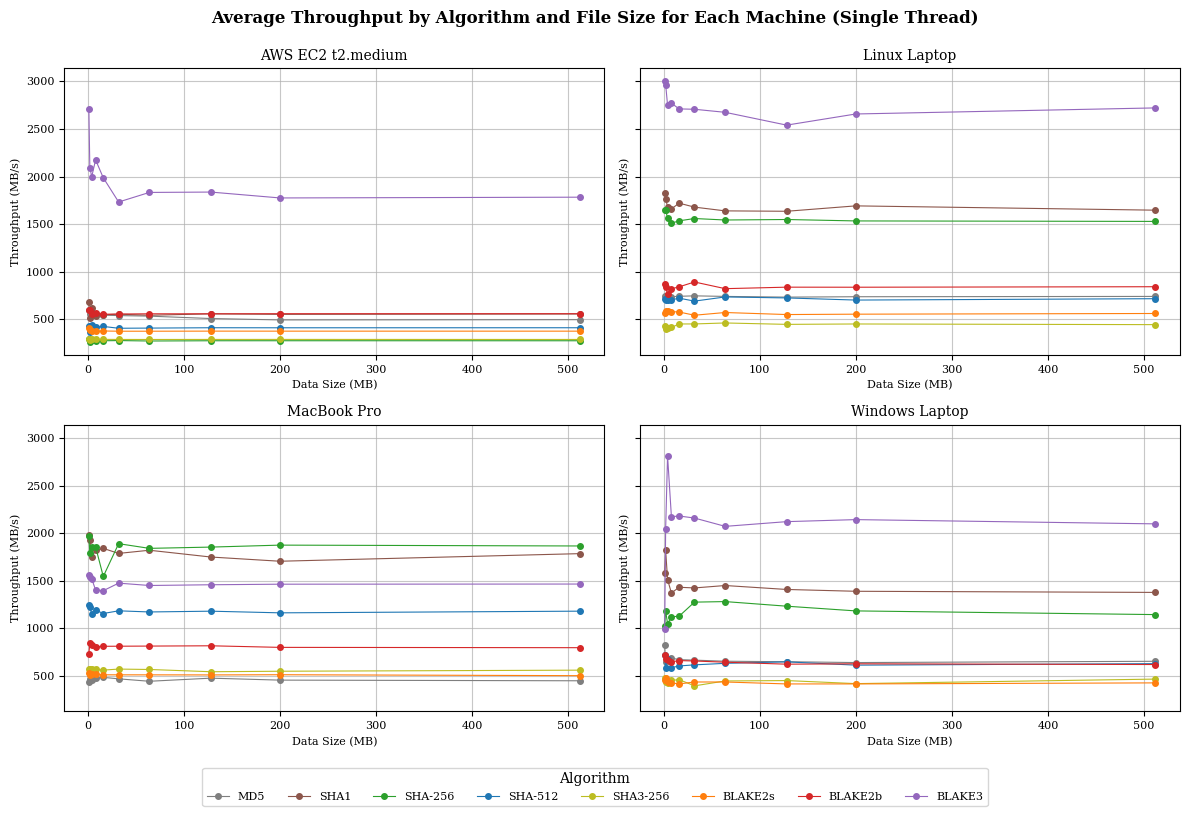

In [679]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
single_thread_df['OS'] = single_thread_df['OS'].replace(os_labels)
single_thread_df['Algorithm'] = single_thread_df['Algorithm'].replace(algorithm_labels)

# Ensure Throughput (MB/s) is calculated
single_thread_df['Throughput (MB/s)'] = (single_thread_df['Data Size (MB)'] / single_thread_df['Timing (ms)']) * 1000

# Get unique operating systems and algorithms
os_list = single_thread_df['OS'].unique()
algorithm_list = single_thread_df['Algorithm'].unique()

# Create subplots for each OS
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

# Store line objects for the legend
line_objects = []
line_labels = []

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'MD5': 'tab:gray',
    'SHA1': 'tab:brown',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
    'SHA3-256': 'tab:olive'
}

# Plot average throughput for each algorithm and file size for each OS
for i, os_type in enumerate(os_list):
    os_data = single_thread_df[single_thread_df['OS'] == os_type]
    for algorithm in algorithm_list:
        algo_data = os_data[os_data['Algorithm'] == algorithm]
        avg_throughput = algo_data.groupby('Data Size (MB)')['Throughput (MB/s)'].mean()
        
        # Plot on the corresponding subplot with thinner lines and markers
        line, = axes[i].plot(
            avg_throughput.index,
            avg_throughput.values,
            marker='o',
            linewidth=0.8,  # Thinner line
            markersize=4,   # Smaller marker
            label=algorithm,
            color=colors[algorithm]
        )
        
        # Collect the line object and label only once (to avoid duplicates)
        if algorithm not in line_labels:
            line_objects.append(line)
            line_labels.append(algorithm)
    
    # Customize the subplot
    axes[i].set_title(f"{os_type}", fontsize=10)
    axes[i].set_xlabel('Data Size (MB)', fontsize=8)
    axes[i].set_ylabel('Throughput (MB/s)', fontsize=8)
    axes[i].grid(alpha=0.7)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Add a single shared legend
fig.legend(
    line_objects,
    line_labels,
    title="Algorithm",
    loc="upper center",
    bbox_to_anchor=(0.5, 0),  # Legend stays above plots
    fontsize=8,
    ncol=len(line_labels)  # Single row
)

# Adjust layout
plt.suptitle(
    'Average Throughput by Algorithm and File Size for Each Machine (Single Thread)', 
    fontsize=12,
    fontweight='bold',
    y=0.94  # Move closer to subplots
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as EPS
output_path = "single_thread_plots/average_throughput_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


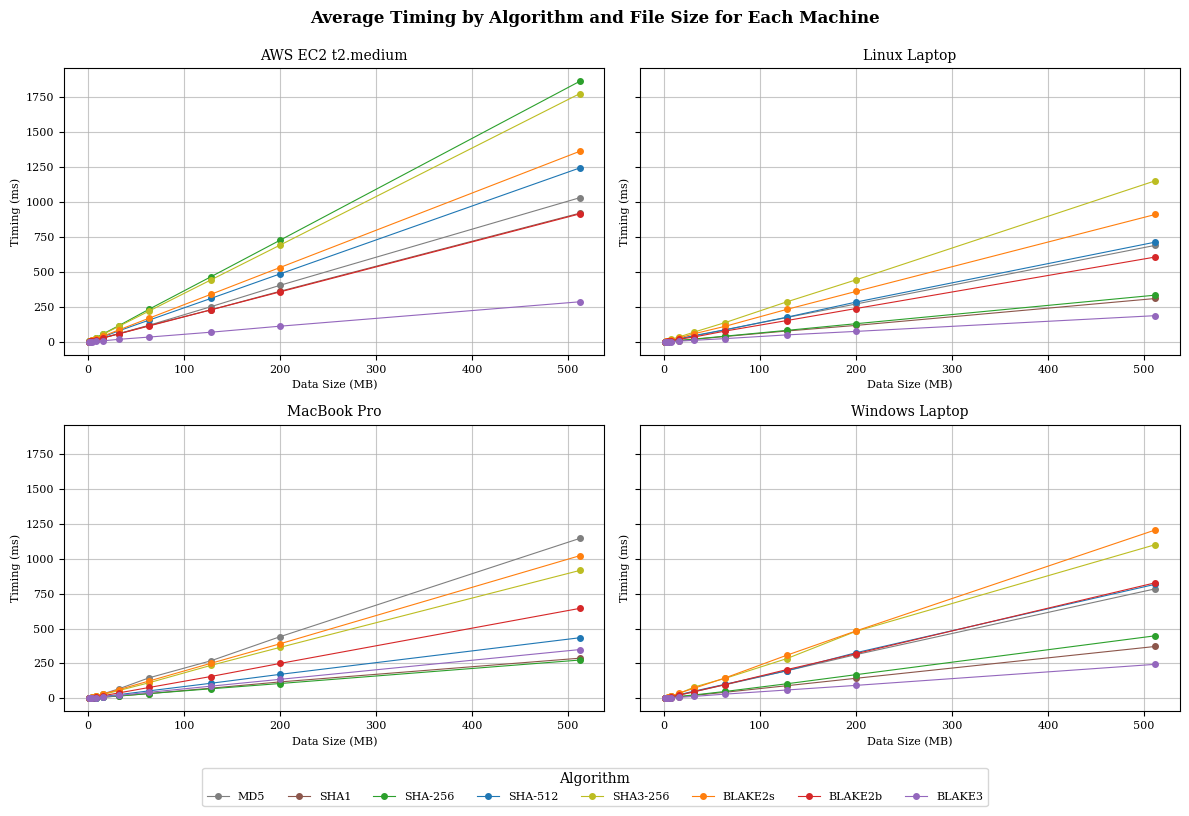

In [680]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
single_thread_df['OS'] = single_thread_df['OS'].replace(os_labels)
single_thread_df['Algorithm'] = single_thread_df['Algorithm'].replace(algorithm_labels)

# Get unique operating systems and algorithms
os_list = single_thread_df['OS'].unique()
algorithm_list = single_thread_df['Algorithm'].unique()

# Create subplots for each OS
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharey=True)
axes = axes.flatten()

# Store line objects for the legend
line_objects = []
line_labels = []

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'MD5': 'tab:gray',
    'SHA1': 'tab:brown',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
    'SHA3-256': 'tab:olive'
}

# Plot average timing for each algorithm and file size for each OS
for i, os_type in enumerate(os_list):
    os_data = single_thread_df[single_thread_df['OS'] == os_type]
    for algorithm in algorithm_list:
        algo_data = os_data[os_data['Algorithm'] == algorithm]
        avg_timing = algo_data.groupby('Data Size (MB)')['Timing (ms)'].mean()
        
        # Plot on the corresponding subplot with thinner lines and markers
        line, = axes[i].plot(
            avg_timing.index,
            avg_timing.values,
            marker='o',
            linewidth=0.8,  # Thinner line
            markersize=4,   # Smaller marker
            label=algorithm,
            color=colors[algorithm]
        )
        
        # Collect the line object and label only once (to avoid duplicates)
        if algorithm not in line_labels:
            line_objects.append(line)
            line_labels.append(algorithm)
    
    # Customize the subplot
    axes[i].set_title(f"{os_type}", fontsize=10)
    axes[i].set_xlabel('Data Size (MB)', fontsize=8)
    axes[i].set_ylabel('Timing (ms)', fontsize=8)
    axes[i].grid(alpha=0.7)
    axes[i].tick_params(axis='both', which='major', labelsize=8)

# Add a single shared legend
fig.legend(
    line_objects,
    line_labels,
    title="Algorithm",
    loc="upper center",
    bbox_to_anchor=(0.5, 0),  # Legend stays above plots
    fontsize=8,
    ncol=len(line_labels)  # Single row
)

# Adjust layout
plt.suptitle(
    'Average Timing by Algorithm and File Size for Each Machine', 
    fontsize=12,
    fontweight='bold',  # Bold suptitle
    y=0.94  # Move closer to subplots
)
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Save the plot as EPS
output_path = "single_thread_plots/average_timing_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

In [681]:
single_thread_df.head()

,Algorithm,Data Size (MB),Timing (ms),OS,Throughput (MB/s)
0,MD5,1,1.775503,AWS EC2 t2.medium,563.220626
1,MD5,1,1.891851,AWS EC2 t2.medium,528.582735
2,MD5,1,1.632452,AWS EC2 t2.medium,612.575434
3,MD5,1,1.575470,AWS EC2 t2.medium,634.731235
4,MD5,1,1.573563,AWS EC2 t2.medium,635.500606


In [682]:
resource_df.head()

,Algorithm,Data Size (MB),CPU (%),Peak Memory (MB),OS
0,md5,1,3.8,122.652344,Aws
1,md5,2,11.3,122.652344,Aws
2,md5,4,11.1,122.652344,Aws
3,md5,8,10.5,122.652344,Aws
4,md5,16,5.9,122.652344,Aws


In [683]:
# Count the number of 0 values in each column of the resource_df
zero_counts = (resource_df == 0).sum()

# Display the total number of 0 values in the entire DataFrame
total_zeros = (resource_df == 0).sum().sum()

print("Number of 0 values in each column:")
print(zero_counts)

print(f"\nTotal number of 0 values in resource_df: {total_zeros}")

Number of 0 values in each column:
Algorithm           0
Data Size (MB)      0
CPU (%)             0
Peak Memory (MB)    0
OS                  0
dtype: int64

Total number of 0 values in resource_df: 0


In [684]:
resource_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Algorithm         320 non-null    object 
 1   Data Size (MB)    320 non-null    int64  
 2   CPU (%)           320 non-null    float64
 3   Peak Memory (MB)  320 non-null    float64
 4   OS                320 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 12.6+ KB


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


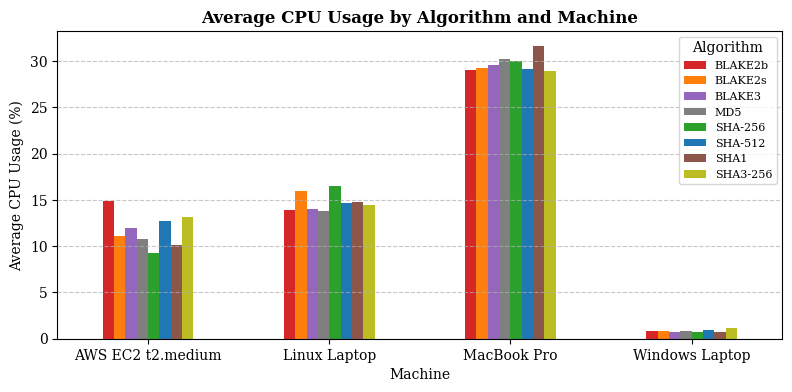

In [685]:
import matplotlib.pyplot as plt
import pandas as pd

# Map for OS and Algorithm labels
os_labels = {
    'Aws': 'AWS EC2 t2.medium',
    'Windows': 'Windows Laptop',
    'Linux': 'Linux Laptop',
    'macOS': 'MacBook Pro'
}

algorithm_labels = {
    'blake2b': 'BLAKE2b',
    'blake2s': 'BLAKE2s',
    'blake3': 'BLAKE3',
    'md5': 'MD5',
    'sha1': 'SHA1',
    'sha256': 'SHA-256',
    'sha512': 'SHA-512',
    'sha3_256': 'SHA3-256'
}

# Replace OS and Algorithm names in the dataframe
resource_df['OS'] = resource_df['OS'].replace(os_labels)
resource_df['Algorithm'] = resource_df['Algorithm'].replace(algorithm_labels)

# Example grouping: Calculate average CPU usage for each Algorithm and OS
average_cpu_usage = resource_df.groupby(['OS', 'Algorithm'])['CPU (%)'].mean().unstack()

# Configure font to serif
plt.rcParams['font.family'] = 'serif'

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'MD5': 'tab:gray',
    'SHA1': 'tab:brown',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
    'SHA3-256': 'tab:olive'
}

# Apply custom colors to the bar plot
color_list = [colors[col] for col in average_cpu_usage.columns]
ax = average_cpu_usage.plot(
    kind='bar',
    figsize=(8, 4),  # Adjusting the size for compactness
    color=color_list
)

# Customize the plot
plt.title('Average CPU Usage by Algorithm and Machine', fontsize=12, fontweight='bold')
plt.xlabel('Machine', fontsize=10)
plt.ylabel('Average CPU Usage (%)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the left of the plot
plt.legend(
    title='Algorithm',
    fontsize=8,
    loc='upper right'
)

# Make it layout-friendly for LNCS
plt.tight_layout(pad=1.0)

# Save the plot as EPS
output_path = "resource_utilization_plots/average_cpu_usage_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


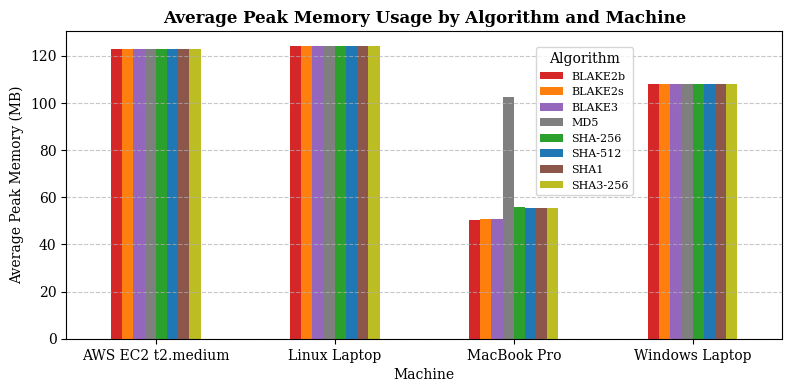

In [686]:
import matplotlib.pyplot as plt

# Replace OS and Algorithm names in the dataframe
resource_df['OS'] = resource_df['OS'].replace(os_labels)
resource_df['Algorithm'] = resource_df['Algorithm'].replace(algorithm_labels)

# Group data by OS and Algorithm, calculate the average peak memory
average_peak_memory = resource_df.groupby(['OS', 'Algorithm'])['Peak Memory (MB)'].mean().unstack()

# Configure font to serif
plt.rcParams['font.family'] = 'serif'

# Define custom colors for each algorithm
colors = {
    'BLAKE2b': 'tab:red',
    'BLAKE2s': 'tab:orange',
    'BLAKE3': 'tab:purple',
    'MD5': 'tab:gray',
    'SHA1': 'tab:brown',
    'SHA-256': 'tab:green',
    'SHA-512': 'tab:blue',
    'SHA3-256': 'tab:olive'
}

# Apply custom colors to the bar plot
color_list = [colors[col] for col in average_peak_memory.columns]
ax = average_peak_memory.plot(
    kind='bar',
    figsize=(8, 4),  # Adjusting the size for compactness
    color=color_list
)

# Customize the plot
plt.title('Average Peak Memory Usage by Algorithm and Machine', fontsize=12, fontweight='bold')
plt.xlabel('Machine', fontsize=10)
plt.ylabel('Average Peak Memory (MB)', fontsize=10)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Move legend to the left of the plot
plt.legend(
    title='Algorithm',
    fontsize=8,
    loc='best',
    bbox_to_anchor=(0.8, 0.45)
)

# Make it layout-friendly for LNCS
plt.tight_layout(pad=1.0)

# Save the plot as EPS
output_path = "resource_utilization_plots/average_peak_memory_plot.eps"
plt.savefig(output_path, format='eps', bbox_inches='tight')

# Show the plot
plt.show()